# The SLGS api
The first section of the code scrapes data from the treasury SLGS api it has a base ending:   
/services/api/fiscal_service/v1/accounting/od/slgs_statistics

The data is filtered to show data from the calandar year 2020 
This code scrapes the data and creates a CSV which is put on One Drive to be automatically loaded into Power BI to refresh the data on a dashboard.  This code has been set up to run automatically through windows task manager. 


In [16]:
import requests
response = requests.get('https://transparency.treasury.gov/services/api/fiscal_service/v1/accounting/od/slgs_statistics?filter=reporting_calendar_year:in:(2020)')
print(response.status_code) # to find if succesful or had an error
#print(response.json()) # gives data retrieved in a messy way
print(response.url) # Paste the result into the browser to check it out..

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


200
https://www.transparency.treasury.gov/services/api/fiscal_service/v1/accounting/od/slgs_statistics?filter=reporting_calendar_year:in:(2020)


In [17]:
# text is a text output of the api data
text = json.dumps(response.json(), sort_keys=True, indent=4)
# give the dictionary version for parsing
jsondic = json.loads(text)
# show the viewer the count of entries retrieved
num_ent = jsondic['meta']['count']
num_ent

15

In [18]:
# show the data dictionary
jsondic['data']

[{'data_date': '2020-01-31',
  'principal_amt': '0',
  'reporting_calendar_day': '31',
  'reporting_calendar_month': '01',
  'reporting_calendar_year': '2020',
  'securities_qty': '0',
  'security_desc': '90 Day C of I',
  'security_group': 'Time'},
 {'data_date': '2020-02-28',
  'principal_amt': '0',
  'reporting_calendar_day': '28',
  'reporting_calendar_month': '02',
  'reporting_calendar_year': '2020',
  'securities_qty': '0',
  'security_desc': '90 Day C of I',
  'security_group': 'Time'},
 {'data_date': '2020-03-31',
  'principal_amt': '0',
  'reporting_calendar_day': '31',
  'reporting_calendar_month': '03',
  'reporting_calendar_year': '2020',
  'securities_qty': '0',
  'security_desc': '90 Day C of I',
  'security_group': 'Time'},
 {'data_date': '2020-01-31',
  'principal_amt': '14929368731',
  'reporting_calendar_day': '31',
  'reporting_calendar_month': '01',
  'reporting_calendar_year': '2020',
  'securities_qty': '2',
  'security_desc': 'SLG C of I',
  'security_group': 'T

In [5]:
# create data frame with the data
df1 = pd.DataFrame(jsondic['data'])  
# sort the data by date
df2 = df1.sort_values('data_date')
df1

,data_date,principal_amt,reporting_calendar_day,reporting_calendar_month,reporting_calendar_year,securities_qty,security_desc,security_group
0,2020-01-31,0,31,01,2020,0,90 Day C of I,Time
1,2020-02-28,0,28,02,2020,0,90 Day C of I,Time
2,2020-03-31,0,31,03,2020,0,90 Day C of I,Time
3,2020-01-31,14929368731,31,01,2020,2,SLG C of I,Time
4,2020-02-28,14714996139,28,02,2020,2,SLG C of I,Time
5,2020-02-28,301740988,28,02,2020,70,Demand Deposit,Demand
6,2020-01-31,268799178,31,01,2020,72,Demand Deposit,Demand
7,2020-03-31,280003424,31,03,2020,76,Demand Deposit,Demand
8,2020-03-31,17751821663,31,03,2020,1948,SLG C of I,Time
9,2020-03-31,5037449933,31,03,2020,3942,SLG Bond,Time


In [6]:
# reset the index but keep the old index numbers of the order of api data as index column
df2.reset_index()

,index,data_date,principal_amt,reporting_calendar_day,reporting_calendar_month,reporting_calendar_year,securities_qty,security_desc,security_group
0,0,2020-01-31,0,31,01,2020,0,90 Day C of I,Time
1,3,2020-01-31,14929368731,31,01,2020,2,SLG C of I,Time
2,6,2020-01-31,268799178,31,01,2020,72,Demand Deposit,Demand
3,10,2020-01-31,5043827120,31,01,2020,3947,SLG Bond,Time
4,12,2020-01-31,53477961352,31,01,2020,9252,SLG Note,Time
5,1,2020-02-28,0,28,02,2020,0,90 Day C of I,Time
6,4,2020-02-28,14714996139,28,02,2020,2,SLG C of I,Time
7,5,2020-02-28,301740988,28,02,2020,70,Demand Deposit,Demand
8,11,2020-02-28,5040544139,28,02,2020,3955,SLG Bond,Time
9,13,2020-02-28,56691013895,28,02,2020,9312,SLG Note,Time


In [7]:
# convert the principal amount column to an integer
df2['principal_amt'] = df2['principal_amt'].astype('int64')

In [8]:
# save data to csv
df2.to_csv('SLGS_2020.csv')

In [9]:
# make groups of monthly borrowing
x = df2.groupby('reporting_calendar_month')

In [10]:
# calculate sume of each month
x.sum()

,principal_amt
reporting_calendar_month,
01,73719956381
02,76748295161
03,84402013589


Text(0.5, 1.0, 'Amount of SLGS debt from 2020 by Month')

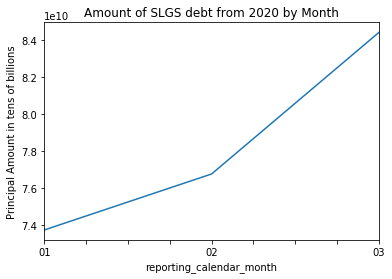

In [11]:
# plot results
x.sum().plot(legend = None)
plt.ylabel('Principal Amount in tens of billions') 
plt.title('Amount of SLGS debt from 2020 by Month') 


# interest on debt
This code scrapes data from the treasury api regarding interest on debts the base ending is:
/services/api/fiscal_service/v1/accounting/od/interest_expense

the data was filtered to include data for the reporting year 2020
and is structered the same way as the code above this data includes interest on all debt and is filtered to include only SLGS debt

In [9]:
import requests
response = requests.get('https://transparency.treasury.gov/services/api/fiscal_service/v1/accounting/od/interest_expense?filter=reporting_calendar_year:in:(2020)')
print(response.status_code) # to find if succesful or had an error
#print(response.json()) # gives data retrieved in a messy way
print(response.url) # Paste the result into the browser to check it out..


200
https://www.transparency.treasury.gov/services/api/fiscal_service/v1/accounting/od/interest_expense?filter=reporting_calendar_year:in:(2020)


In [10]:
# text is a text output 
text = json.dumps(response.json(), sort_keys=True, indent=4)
# give the dictionary version for parsing
jsondic = json.loads(text)
num_ent = jsondic['meta']['count']
num_ent

100

In [11]:
text = json.dumps(response.json(), sort_keys=True, indent=4)
jsondic = json.loads(text)
jsondic['data']

[{'expense_catg_desc': 'INTEREST EXPENSE ON GOVT ACCOUNT SERIES',
  'expense_group_desc': 'CASH BASIS GAS PAYMENTS',
  'expense_type_desc': 'Premium Collected on Issues',
  'fytd_expense_amt': '-10486083886.21',
  'month_expense_amt': '-327964583.49',
  'reporting_calendar_day': '31',
  'reporting_calendar_month': '01',
  'reporting_calendar_quarter': '1',
  'reporting_calendar_year': '2020',
  'reporting_date': '2020-01-31',
  'reporting_fiscal_month': '04',
  'reporting_fiscal_quarter': '2',
  'reporting_fiscal_year': '2020'},
 {'expense_catg_desc': 'INTEREST EXPENSE ON GOVT ACCOUNT SERIES',
  'expense_group_desc': 'CASH BASIS GAS PAYMENTS',
  'expense_type_desc': 'Accrued Interest Collected on Issues',
  'fytd_expense_amt': '-697778647.77',
  'month_expense_amt': '-183332932.34',
  'reporting_calendar_day': '31',
  'reporting_calendar_month': '01',
  'reporting_calendar_quarter': '1',
  'reporting_calendar_year': '2020',
  'reporting_date': '2020-01-31',
  'reporting_fiscal_month': 

In [12]:
df1 = pd.DataFrame(jsondic['data'])     
df1

,expense_catg_desc,expense_group_desc,expense_type_desc,fytd_expense_amt,month_expense_amt,reporting_calendar_day,reporting_calendar_month,reporting_calendar_quarter,reporting_calendar_year,reporting_date,reporting_fiscal_month,reporting_fiscal_quarter,reporting_fiscal_year
0,INTEREST EXPENSE ON GOVT ACCOUNT SERIES,CASH BASIS GAS PAYMENTS,Premium Collected on Issues,-10486083886.21,-327964583.49,31,01,1,2020,2020-01-31,04,2,2020
1,INTEREST EXPENSE ON GOVT ACCOUNT SERIES,CASH BASIS GAS PAYMENTS,Accrued Interest Collected on Issues,-697778647.77,-183332932.34,31,01,1,2020,2020-01-31,04,2,2020
2,INTEREST EXPENSE ON PUBLIC ISSUES,AMORTIZED PREMIUM,Treasury Inflation Protected Securities (TIPS),-603017916.60,-154356794.77,31,01,1,2020,2020-01-31,04,2,2020
3,INTEREST EXPENSE ON PUBLIC ISSUES,AMORTIZED PREMIUM,Treasury Notes,-308832994.75,-78375917.78,31,01,1,2020,2020-01-31,04,2,2020
4,INTEREST EXPENSE ON PUBLIC ISSUES,AMORTIZED PREMIUM,Treasury Bonds,-182874931.31,-46863858.22,31,01,1,2020,2020-01-31,04,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,INTEREST EXPENSE ON GOVT ACCOUNT SERIES,CASH BASIS GAS PAYMENTS,Restoration of Interest,115594703.66,0.00,31,03,1,2020,2020-03-31,06,2,2020
96,INTEREST EXPENSE ON PUBLIC ISSUES,AMORTIZED DISCOUNT,Treasury Bonds,428767105.97,74380575.05,31,03,1,2020,2020-03-31,06,2,2020
97,INTEREST EXPENSE ON PUBLIC ISSUES,AMORTIZED DISCOUNT,Treasury Inflation Protected Securities (TIPS),537934615.70,90169386.41,31,03,1,2020,2020-03-31,06,2,2020
98,INTEREST EXPENSE ON PUBLIC ISSUES,ACCRUED INTEREST EXPENSE,"State & Local Government-C/I's, Notes & Bonds",678883294.51,127208327.30,31,03,1,2020,2020-03-31,06,2,2020


In [13]:
# filter to include only state and local debt
df2 = df1[df1['expense_type_desc'] == "State & Local Government-C/I's, Notes & Bonds"]
# sort by date of reporting
df2 = df2.sort_values('reporting_date')


In [14]:
df2

,expense_catg_desc,expense_group_desc,expense_type_desc,fytd_expense_amt,month_expense_amt,reporting_calendar_day,reporting_calendar_month,reporting_calendar_quarter,reporting_calendar_year,reporting_date,reporting_fiscal_month,reporting_fiscal_quarter,reporting_fiscal_year
22,INTEREST EXPENSE ON PUBLIC ISSUES,ACCRUED INTEREST EXPENSE,"State & Local Government-C/I's, Notes & Bonds",441092173.51,118558378.59,31,01,1,2020,2020-01-31,04,2,2020
60,INTEREST EXPENSE ON PUBLIC ISSUES,ACCRUED INTEREST EXPENSE,"State & Local Government-C/I's, Notes & Bonds",551674967.21,110582793.70,29,02,1,2020,2020-02-29,05,2,2020
98,INTEREST EXPENSE ON PUBLIC ISSUES,ACCRUED INTEREST EXPENSE,"State & Local Government-C/I's, Notes & Bonds",678883294.51,127208327.30,31,03,1,2020,2020-03-31,06,2,2020


In [15]:
df2.to_csv('Interest_SLG_Debt.csv')

### Revenue Collection

In [19]:
response = requests.get('https://transparency.treasury.gov/services/api/fiscal_service/v1/revenue/rcm?filter=reporting_calendar_year:in:(2020)')

In [20]:
print(response.status_code) # to find if succesful or had an error
#print(response.json()) # gives data retrieved in a messy way
print(response.url) # Paste the result into the browser to check it out..


200
https://www.transparency.treasury.gov/services/api/fiscal_service/v1/revenue/rcm?filter=reporting_calendar_year:in:(2020)


In [21]:
# text is a text output 
text = json.dumps(response.json(), sort_keys=True, indent=4)
# give the dictionary version for parsing
jsondic = json.loads(text)
num_ent = jsondic['meta']['count']
num_ent

100

In [22]:
#jsondic['data']
df1 = pd.DataFrame(jsondic['data'])     
df1

,channel_type_group_name,channel_type_id,electronic_category_desc,electronic_category_id,electronic_subcategory_nm,net_collections_amt,reporting_calendar_day,reporting_calendar_month,reporting_calendar_year,reporting_date,reporting_fiscal_month,reporting_fiscal_quarter,reporting_fiscal_year,tax_category_id,tax_category_nm
0,Internet,3,Electronic,1,Fully Electronic - All,547793044.34,27,03,2020,2020-03-27,06,2,2020,1,Non-Tax
1,Over-the-Counter (OTC),1,Electronic,2,Fully Electronic - FS,66864970.43,30,01,2020,2020-01-30,04,2,2020,1,Non-Tax
2,Mail,2,Electronic,3,Electronic Settlement,417651239.67,20,02,2020,2020-02-20,05,2,2020,3,IRS Tax
3,Bank,5,Electronic,1,Fully Electronic - All,1976707865.32,21,01,2020,2020-01-21,04,2,2020,1,Non-Tax
4,Over-the-Counter (OTC),1,Electronic,2,Fully Electronic - FS,68923381.21,16,03,2020,2020-03-16,06,2,2020,3,IRS Tax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Internet,3,Electronic,1,Fully Electronic - All,193237.68,19,02,2020,2020-02-19,05,2,2020,2,IRS Non-Tax
96,Internet,3,Electronic,1,Fully Electronic - All,622776763.93,06,03,2020,2020-03-06,06,2,2020,1,Non-Tax
97,Internet,3,Electronic,1,Fully Electronic - All,297529359.68,18,03,2020,2020-03-18,06,2,2020,1,Non-Tax
98,Over-the-Counter (OTC),1,Electronic,2,Fully Electronic - FS,100488175.36,05,03,2020,2020-03-05,06,2,2020,1,Non-Tax


In [27]:
df2 = df1[df1['tax_category_nm'] == 'IRS Tax']

In [28]:
df2.to_csv('tax_collected.csv')

## Unemployment payments

In [ ]:
#this is the base ending    
#   /services/api/fiscal_service/v1/accounting/od/title_xii